# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [142]:
import pandas as pd
df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
df.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [19]:
df.shape

(10000, 18)

In [21]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [23]:
df[['fare_amount','tip_amount', 'tolls_amount','total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [25]:
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].loc[df['trip_distance'].idxmax()]

fare_amount     176.00
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: float64

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [27]:
mf = pd.read_csv('../data/Meteorite_Landings.csv')
mf = mf.rename(
    columns={
        'mass (g)': 'mass'
    }
)
mf.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [31]:
columns_to_drop = mf[['reclat','reclong','GeoLocation']]
mf = mf.drop(columns=columns_to_drop)
mf.sort_values('mass', ascending=False).head()

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [101]:
mf1 = pd.read_csv('../data/Meteorite_Landings.csv')

In [57]:
mf1.year.head()

0    01/01/1880 12:00:00 AM
1    01/01/1951 12:00:00 AM
2    01/01/1952 12:00:00 AM
3    01/01/1976 12:00:00 AM
4    01/01/1902 12:00:00 AM
Name: year, dtype: object

In [85]:
print("\nNumber of NaN values:")
mf1['year'].isna().sum()


Number of NaN values:


291

In [91]:
mf1['year'] = mf1['year'].where(mf1['year'].isna(), mf1['year'].str[6:10])
mf1['year'] = pd.to_numeric(mf1['year'])
mf1['pre_1970'] = mf1['year'] < 1970
mf1.set_index('id', inplace=True)
mf1.sort_index(inplace=True)
result = mf1.loc[10036:10040]
result

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,pre_1970
id,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,31.33333,-82.31667,"(31.33333, -82.31667)",True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,39.86667,-83.95000,"(39.86667, -83.95)",True
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,30.30000,109.50000,"(30.3, 109.5)",False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",True


In [144]:
# Bonus: It seems id=10040 does not exist in this dataset.

#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [113]:
mf2 = pd.read_csv('../data/Meteorite_Landings.csv')
mf2['year'] = mf2['year'].where(mf2['year'].isna(), mf2['year'].str[6:10])
mf2['year'] = pd.to_numeric(mf2['year'])

In [115]:
mf2.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [123]:
import numpy as np
pivot = pd.pivot_table(
    data=mf2[(mf2['year'] >= 2005) & (mf2['year'] <= 2009)],
    values='mass (g)',
    index='year',
    columns='fall',
    aggfunc=['count', lambda x: np.percentile(x, 95)]
)

pivot.rename(columns={pivot.columns.levels[0][1]: '95th_percentile Mass(g)'}, level=0, inplace=True)
pivot

count         95th_percentile Mass(g)         
fall    Fell   Found                    Fell    Found
year                                                 
2005.0   NaN   874.0                     NaN      NaN
2006.0   5.0  2450.0                 25008.0      NaN
2007.0   8.0  1181.0                 89675.0  1126.90
2008.0   9.0   948.0                106000.0  2274.80
2009.0   5.0  1492.0                  8333.4  1397.25

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [125]:
mf3 = pd.read_csv('../data/Meteorite_Landings.csv')

In [127]:
stats_df = pd.crosstab(
    index=mf3['fall'],
    columns='Mass Statistics',
    values=mf3['mass (g)'],
    aggfunc=['count', 'mean', 'std', 'min', 'max']
)

stats_df.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Max']
stats_df = stats_df.round(2)
stats_df

,Count,Mean,Std Dev,Min,Max
fall,,,,,
Fell,1075,47070.72,717067.13,0.1,23000000.0
Found,44510,12461.92,571105.75,0.0,60000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [135]:
taxi_df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
taxi_df = taxi_df.set_index('tpep_dropoff_datetime')

In [139]:
hourly_stats = taxi_df.resample('h').agg({
    'trip_distance': 'sum',
    'fare_amount': 'sum',
    'tolls_amount': 'sum',
    'tip_amount': 'sum'
})

top_tip_hours = hourly_stats.nlargest(5, 'tip_amount')
top_tip_hours

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [146]:
import pandas as pd

tsa_melted_holiday_travel = pd.read_csv(
    '../data/tsa_melted_holiday_travel.csv',
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


In [150]:
import matplotlib_inline
from utils import mpl_svg_config

matplotlib_inline.backend_inline.set_matplotlib_formats(
    'svg',
    **mpl_svg_config('section-3')
)

travelers    Axes(0.125,0.11;0.775x0.77)
dtype: object

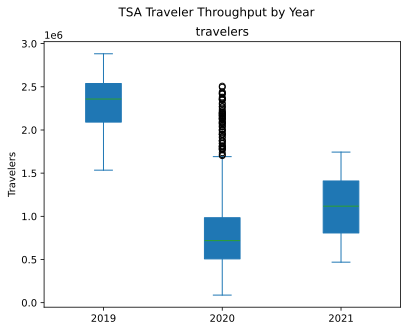

In [187]:
tsa_melted_holiday_travel.plot(kind='box', by='year',
                              title='TSA Traveler Throughput by Year', 
                              ylabel='Travelers',
                              patch_artist=True)

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [177]:
import seaborn as sns
import calendar

data = tsa_melted_holiday_travel['2019':'2019']\
    .assign(month=lambda x: x.index.month,
            day_of_week=lambda x: x.index.day_name())\
    .pivot_table(index='day_of_week', 
                columns='month', 
                values='travelers', 
                aggfunc='median')
data

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
Friday,2101692.5,2106456.5,2378673.0,2448675.0,2512315.0,2655971.5,2714039.0,2584444.0,2468865.0,2548725.5,2396681.0,2409823.5
Monday,1965342.5,2108074.5,2495543.0,2499461.0,2513732.5,2530726.5,2542365.0,2349372.0,2082179.0,2230216.0,2110044.5,2054380.0
Saturday,1602780.0,1897686.5,2122898.0,2155378.0,2351812.0,2644981.0,2625213.5,2567986.0,2387325.0,2457413.0,2403304.0,2370444.5
Sunday,1990412.0,2151817.0,2187298.0,2255325.5,2328201.0,2433189.0,2473318.5,2277137.5,2013050.0,2081132.5,2077552.0,2009112.0
Thursday,1991328.0,2267561.5,2526468.5,2454865.0,2124825.0,2343896.0,2355385.5,2171962.0,1909112.0,1931971.0,2051548.0,2182328.5
Tuesday,1733739.0,1758577.0,2551498.0,2521897.0,2633590.0,2693454.0,2705399.0,2581777.5,2452356.0,2541581.0,2396507.5,2392331.0
Wednesday,1763884.0,1982732.0,2200050.5,2001089.5,2570613.0,2729187.5,2730936.0,2643061.0,2515818.0,2594337.0,2490780.5,2485304.5


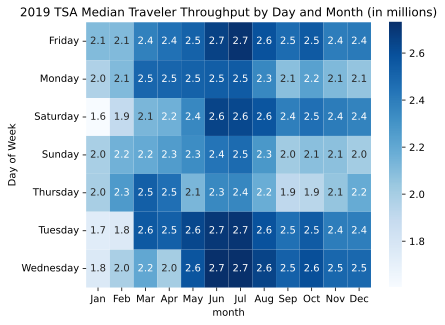

In [181]:
ax = sns.heatmap(data=data/1e6, 
                cmap='Blues', 
                annot=True, 
                fmt='.1f')
_ = ax.set_xticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_ylabel('Day of Week') 
_ = ax.set_title('2019 TSA Median Traveler Throughput by Day and Month (in millions)')

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

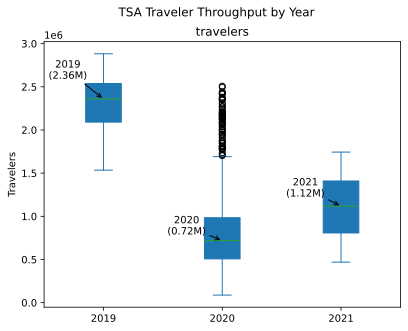

In [201]:
import matplotlib.pyplot as plt
import pandas as pd

plot = tsa_melted_holiday_travel.plot(kind='box', by='year',
                                  title='TSA Traveler Throughput by Year', 
                                  ylabel='Travelers',
                                  patch_artist=True)
ax = plt.gca()
medians = tsa_melted_holiday_travel.groupby('year')['travelers'].median()

for x, (year, median) in zip(range(1, len(ax.get_xticklabels()) + 1), medians.items()):
    plot = ax.annotate(
        f'{year}\n({median/1e6:.2f}M)', 
        xy=(x, median),  
        xytext=(x - 0.3, median * 1.1),  
        arrowprops={'arrowstyle': '->'},  
        ha='center'  
    )